In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from scipy.spatial.distance import cdist

In [14]:
#folder of the training dataset
train_dataset_path = "../Projet/the_dataset/train - Copie/"
#folder of the training dataset
test_dataset_path = "../Projet/the_dataset/test/"

In [15]:
# File reading ----------------------
#Helps read subclasses 
def Read_Show_dataset(root_folder):
    image_paths = []
    for class_folder in os.listdir(root_folder):
        class_path = os.path.join(root_folder, class_folder)
        if os.path.isdir(class_path):
            for subclass_folder in os.listdir(class_path):
                subclass_path = os.path.join(class_path, subclass_folder)
                if os.path.isdir(subclass_path):
                    for image_name in os.listdir(subclass_path):
                        image_path = os.path.join(subclass_path, image_name)
                        image_path = image_path.replace("\\", "/")
                        image_paths.append(image_path)
                        
                        
    return image_paths  

#read the training class             
def Read_Show_dataset_train(root_folder):
    images = []
    image_names = os.listdir(root_folder)
    for image_name in image_names:
        image_path = os.path.join(root_folder, image_name)
        image = cv2.imread(image_path, 0)
        images.append(image)
        
    return images        
trainings = Read_Show_dataset_train(train_dataset_path)
testings = Read_Show_dataset(test_dataset_path)
#print(f" training paths : \n", trainings,"testing paths: \n ", testings)

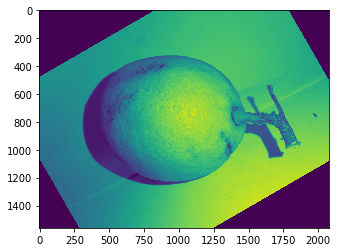

In [42]:
#test = random.choice(testings)
test = "../Projet/the_dataset/test/fruits/citron/img003.jpg"
test = cv2.imread(test, 0)
#test = cv2.pyrDown(training)
test = cv2.pyrDown(test)
num_rows, num_cols = test.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test, rotation_matrix, (num_cols, num_rows))
plt.imshow(test_image)
plt.show()

In [43]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# create BFMatcher object
bf = cv2.BFMatcher()
# find the keypoints and descriptors with SIFT (extracting the sift features)
test_keypoint, test_descriptor = sift.detectAndCompute(test_image,None)
similarities = []
scores = []

pourcentage = 0
for training in trainings:
    #get the descrptor of each training image
    keypoints, descriptors = sift.detectAndCompute(training, None)
    matches = bf.match(test_descriptor,descriptors)
    distances = cdist(test_descriptor, descriptors, metric='euclidean')
    average_distance = np.mean(distances)
    similarities.append(average_distance)
    pourcentage += 1
    print(f"Images read: {pourcentage}/{len(trainings)}")
    #scores.append(len(matches))
most_similar_training_index = similarities.index(min(similarities))
#scores = np.array(scores)

# Match descriptors.
# sort the matches based on distance
# bon hadi ida habit nel9aha hiya elle meme f la liste d'images taei
# matches = sorted(matches, key=lambda val: val.distance)
# best_match = matches[0]



Images read: 1/47
Images read: 2/47
Images read: 3/47
Images read: 4/47
Images read: 5/47
Images read: 6/47
Images read: 7/47
Images read: 8/47
Images read: 9/47
Images read: 10/47
Images read: 11/47
Images read: 12/47
Images read: 13/47
Images read: 14/47
Images read: 15/47
Images read: 16/47
Images read: 17/47
Images read: 18/47
Images read: 19/47
Images read: 20/47
Images read: 21/47
Images read: 22/47
Images read: 23/47
Images read: 24/47
Images read: 25/47
Images read: 26/47
Images read: 27/47
Images read: 28/47
Images read: 29/47
Images read: 30/47
Images read: 31/47
Images read: 32/47
Images read: 33/47
Images read: 34/47
Images read: 35/47
Images read: 36/47
Images read: 37/47
Images read: 38/47
Images read: 39/47
Images read: 40/47
Images read: 41/47
Images read: 42/47
Images read: 43/47
Images read: 44/47
Images read: 45/47
Images read: 46/47
Images read: 47/47


In [47]:
max_score = np.max(distances)
#max_index = np.argmax(scores)

best_image = trainings[most_similar_training_index]

best_image_keypoints, best_image_descriptors = sift.detectAndCompute(best_image, None)
best_match = bf.match(test_descriptor, best_image_descriptors)

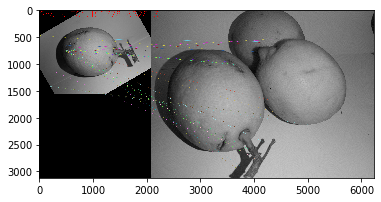

In [48]:
result = cv2.drawMatches(
    test_image,
    test_keypoint,
    best_image,
    best_image_keypoints,
    best_match[:30],
    None,
    flags=2,
)

cv2.putText(
    result,
    f"Score: {max_score}",
    (10, 130),
    cv2.FONT_HERSHEY_SIMPLEX,
    5,
    (255, 0, 0),
    2,
    cv2.LINE_AA,
)

plt.imshow(result)
plt.show()